# Evaluation Project -
# Global Power Plant Database
# Problem Statement:
# Description:

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Key attributes of the database
# The database includes the following indicators:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
-  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
- 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
# Fuel Type Aggregation:
- We define the "Fuel Type" attribute of our database based on common fuel categories. 

- Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [94]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [95]:
#READ THE DATASET


df=pd.read_csv('C:/Users/HP/Desktop/data sets/globalppdatabase_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


- In this dataset we got the database information of power plants around India.It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 908 power plants accross India and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type.
- Here we have two target variables ,Primary fuels and capacity_mw.Primary fuel is categorical in natre and Capacity mw is continuous in Nature,Hence this is both classificaton and Regression Problem.While predicting Primary fuel we will use classification models and while calculating capacity_mw we will use regression models.
- Variables we got:-
- 1 country	- 3 character country code.
- 2 country_long -longer form of the country designation.
- 3	name- name or title of the power plant, generally in Romanized form.
- 4	gppd_idnr- 10 or 12 character identifier for the power plant.
- 5 capacity_mw -electrical generating capacity in megawatts.
- 6	primary_fuel - energy source used in primary electricity generation or export.
- 7	other_fuel1	- energy source used in electricity generation or export.
- 8	other_fuel2	- energy source used in electricity generation or export.
- 9	other_fuel3	- energy source used in electricity generation or export.
- 10 commissioning_year - year of plant operation, weighted by unit-capacity when data is available.
- 11 owner -majority shareholder of the power plant, generally in Romanized form.
- 12 source-entity reporting the data; could be an organization, report, or document, generally in Romanized form.
- 13 url - web document corresponding to the source field.
- 14 geolocation_source - attribution for geolocation information.
- 15 wepp_id - a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- 16 year_of_capacity_data - year the capacity information was reported.
- 17 generation_data_source - attribution for the reported generation information.
- 18 est_gen_gwh2013 - estimated electricity generation in gigawatt-hours for the year 2013.
- 19 est_gen_gwh2014 - estimated electricity generation in gigawatt-hours for the year 2014.
- 20 est_gen_gwh2015 - estimated electricity generation in gigawatt-hours for the year 2015.
- 21 est_gen_gwh2016 -	estimated electricity generation in gigawatt-hours for the year 2016.
- 22 est_gen_gwh2017 -estimated electricity generation in gigawatt-hours for the year 2017.


In [96]:
df.nunique()

country                       1
country_long                  1
name                        908
gppd_idnr                   908
capacity_mw                 365
latitude                    837
longitude                   828
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013         364
generation_gwh_2014         374
generation_gwh_2015         398
generation_gwh_2016         405
generation_gwh_2017         410
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

- The dataset contains only about one country which is India.
- Country long is same as Country.
- There are eight types of primary fuel.
- There are 280 owner details.
- There are three geolocation_source.

In [97]:
df.shape

(908, 25)

- There are 908 rows and 25 columns in the dataset that means we have total no of 908 entries and 25 features in this dataset.

In [98]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

- Found out all the column names of the dataset.There are 25 columns in this dataset.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

- The dataset is mixture of nominal, continuous and categorical values.

In [100]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- The dataset is mixture of nominal, continuous and categorical values.

In [101]:
# Statistical summary:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,908.0,321.046378,580.221767,0.0000,16.837500,60.000000,388.125000,4760.000
latitude,862.0,21.196189,6.248627,8.1689,16.771575,21.778300,25.516375,34.649
longitude,862.0,77.447848,4.907260,68.6447,74.258975,76.719250,79.441475,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,528.0,1996.876894,17.047817,1927.0000,1988.000000,2000.000000,2011.250000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,520.0,2018.000000,0.000000,2018.0000,2018.000000,2018.000000,2018.000000,2018.000
generation_gwh_2013,384.0,2304.059202,3794.767492,0.0000,244.458088,797.063475,2795.021500,27586.200
generation_gwh_2014,401.0,2420.393316,4013.558173,0.0000,223.650436,805.760000,3034.575000,28127.000
generation_gwh_2015,425.0,2414.072373,4183.203199,0.0000,174.174750,701.027250,3080.000000,30539.000


- as we have seen earlier that there are 908 columns in the dataset,only capacity_mw is having full 908 values.That means there is missing values in almost all the coluns.
- The interquartile ranges of the longitude column is not perfect,there may be skewness in the dataset.
- There is no values in other_fuel3 column.we will delete this column before building model.
- There is no values in wepp_id column.we will delete this column before building model.
- The Year of capacity data contains same values.
- estimated_generation_gwh have mising values.
- generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017 will be having skewness and outliers because the minimum values are zero which is lesser than standard deviation.

In [102]:
#Checking null values:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

- we can see that there is null values in almost all the columns except country,country_long,name,gppd_inr,capacity_mw,source and url.

In [103]:
# filling the missing values of the numerical columns:

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())
df['wepp_id'] = df['wepp_id'].fillna(df['wepp_id'].mean())
df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mean())
df['generation_gwh_2013'] = df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mean())
df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df['estimated_generation_gwh'] = df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].mean())
df['other_fuel3'] = df['other_fuel3'].fillna(df['other_fuel3'].mean())


- filled the missing values of the numerical columns by using mean method.

In [104]:
#filling the missing values of the categorical columns:
df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])
df['other_fuel2'] = df['other_fuel2'].fillna(df['other_fuel2'].mode()[0])
df['owner'] = df['owner'].fillna(df['owner'].mode()[0])


- filled the missing values of the categorical columns with mode fuction.

In [105]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                         0
source                        0
url                           0
geolocation_source            0
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013           0
generation_gwh_2014           0
generation_gwh_2015           0
generation_gwh_2016           0
generation_gwh_2017           0
generation_data_source        0
estimated_generation_gwh    908
dtype: int64

- All the columns are filled in the null values except other_fuel3,wepp_id and estimated_generation_gwh because we have seen earlier in the statistical summary that this columns have no data at all ,so mean or mode function is not working.we will remove this column before creating the model.

In [106]:
# Counting country columns:
df['country'].value_counts()

IND    908
Name: country, dtype: int64

In [107]:
# Counting country long column:
df['country_long'].value_counts()

India    908
Name: country_long, dtype: int64

- Country long values are just the full form of the country name India.Both the column name have only one type of value ,so we can drop both the columns in future.

In [108]:
#Counting the name column:
df['name'].value_counts()

MOYAR                        1
KADRA                        1
KORADI                       1
DANAPUR BMM                  1
NABI NAGAR TPP               1
                            ..
OBRA                         1
BELGAUM UGAR                 1
BAKRESWAR                    1
TVS Tirunelveli Wind Farm    1
TANIR BAVI                   1
Name: name, Length: 908, dtype: int64

- There are 908 unique names of the Power Plant in India in this column.


In [109]:
# Counting the gppd_idnr column:
df['gppd_idnr'].value_counts()

IND0000484    1
WRI1026143    1
WRI1026178    1
IND0000516    1
WRI1019904    1
             ..
IND0000012    1
WRI1026211    1
WRI1026082    1
IND0000359    1
IND0000258    1
Name: gppd_idnr, Length: 908, dtype: int64

- There are 908 unique alphanumeric serial nos which helps as the identifier  of the Power Plants in India.

In [110]:
# Counting the primary fuel column:
df['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

- There are eight types of primary fuel used by the Power Plants.Most(259 power plants) of the power plants use Coal as their fuel.Nuclear as a fuel is used rarely by the power plants in India.It is only used in 9 power plants.

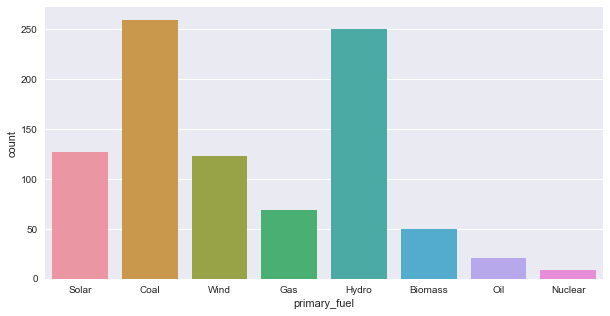

In [111]:
# Plotting the Primary fuel column:
plt.figure(figsize=(10,5))
sns.countplot('primary_fuel',data=df)
plt.show()

- There are eight types of primary fuel used by the Power Plants.Most(259 power plants) of the power plants use Coal as their fuel.Nuclear as a fuel is used rarely by the power plants in India.It is only used in 9 power plants.

In [112]:
# Counting Fuel 1 column:
df['other_fuel1'].value_counts()

Oil             905
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

- There are three types of fuels in other_fuel1 column .Oil is used in 196 Power Plants and Cogeneration is used only in one Power Plant.

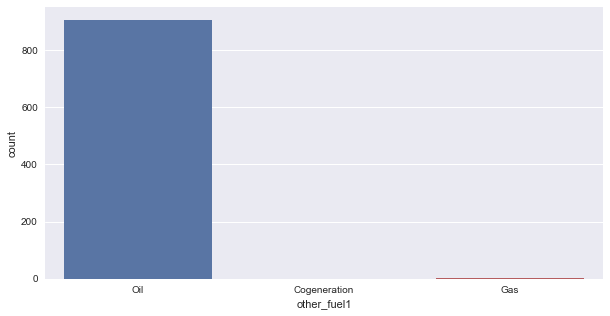

In [113]:
# Plotting the other_fuel1 column:
plt.figure(figsize=(10,5))
sns.countplot('other_fuel1',data=df)
plt.show()

- There are three types of fuels in other_fuel1 column .Oil is used in 196 Power Plants and Cogeneration is used only in one Power Plant.

In [114]:
# Counting fuel 2 columnn:
df['other_fuel2'].value_counts()

Oil    908
Name: other_fuel2, dtype: int64

- There is only  one type of fuel in other_fuel2 which is oil.

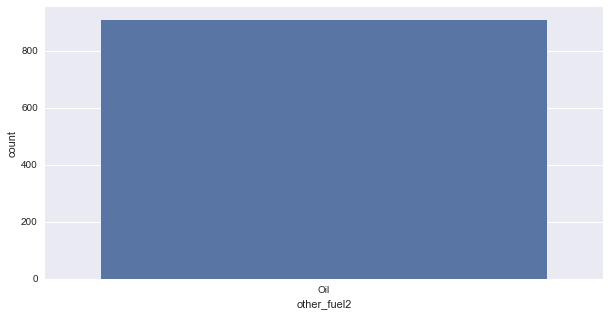

In [115]:
# Plotting the other_fuel2 column:
plt.figure(figsize=(10,5))
sns.countplot('other_fuel2',data=df)
plt.show()

- There is only one type of fuel in other_fuel2 which is oil.

In [116]:
# Counting the owner column:
df['owner'].value_counts()

Acc Acc ltd                                     570
Jk Cement ltd                                     4
Sterling Agro Industries ltd.                     4
Tata Power Solar Systems Limited (TPREL)          3
SWPPL                                             3
                                               ... 
Sunkon Energy Private Limited                     1
Fortune Five Hydel Projects Limited               1
Madhav Solar Private Limited                      1
Bangalore Electricity Supply Company Limited      1
India Oil Corporation Limited                     1
Name: owner, Length: 280, dtype: int64

- There are 280 different owners of the Powerplants.

In [117]:
# Counting the source column:
df['source'].value_counts()

Central Electricity Authority                   520
CDM                                             124
Lancosola                                        10
National Renewable Energy Laboratory              8
National Thermal Power Corporation (NTPC)         6
                                               ... 
Pandit Deendayal Petrolium University (PDPU)      1
Videocon Industries Limited                       1
Solaer                                            1
Welspun Solar AP Private Limited                  1
Uttam Steels ltd                                  1
Name: source, Length: 191, dtype: int64

- There are 191 different sources of the Powerplants.

In [118]:
# Counting the geolocation_source column:
df['geolocation_source'].value_counts()

WRI                                     785
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

- There are three geo location source.The highest is WRI(766) and the lowest is National Renewable Energy Laboratory(4).

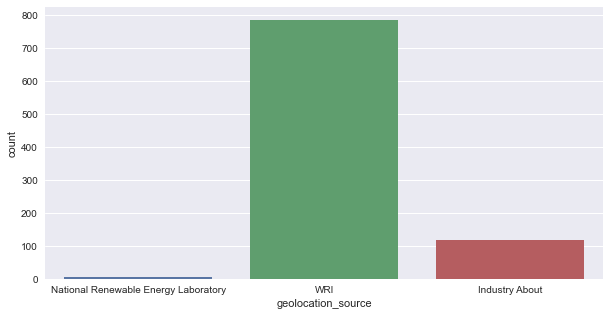

In [119]:
# Plotting the Geo location source:
plt.figure(figsize=(10,5))
sns.countplot('geolocation_source',data=df)
plt.show()

- There are three geo location source.The highest is WRI(766) and the lowest is National Renewable Energy Laboratory(4).

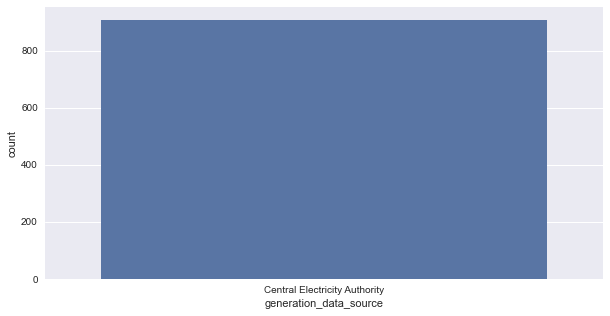

In [120]:
# Plotting  Generation Data Sorce:
plt.figure(figsize=(10,5))
sns.countplot('generation_data_source',data=df)
plt.show()

- There is only one generation_data_source.

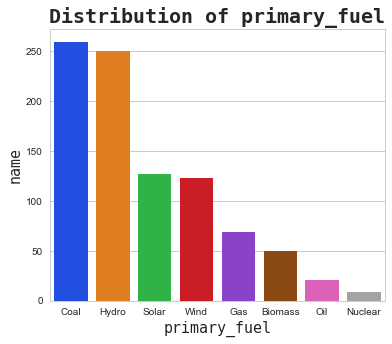

In [121]:
# Creating a barplot for 'Primary fuel'
income = df['primary_fuel'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of primary_fuel', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('primary_fuel', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('name', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

- There are eight types of primary fuel used by the Power Plants.Most(259 power plants) of the power plants use Coal as their fuel.Nuclear as a fuel is used rarely by the power plants in India.It is only used in 9 power plants.

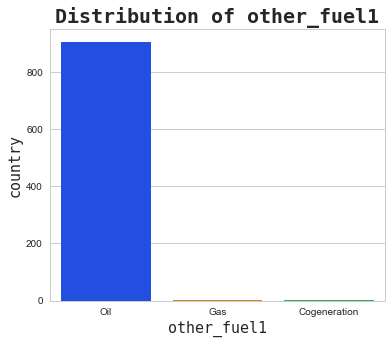

In [122]:
# Creating a barplot for 'other_fuel1'
income = df['other_fuel1'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of other_fuel1', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('other_fuel1', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('country', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

- There are three types of fuels in other_fuel1 column .Oil is used in 196 Power Plants and Cogeneration is used only in one Power Plant.

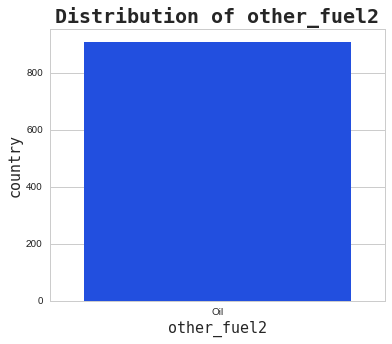

In [123]:
# Creating a barplot for 'Other fuel2'
income = df['other_fuel2'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of other_fuel2', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('other_fuel2', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('country', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

- There is only oil in Other ful 2 column.

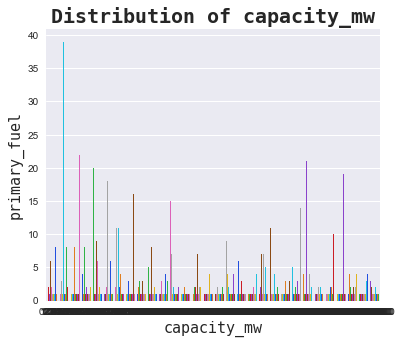

In [124]:

# Plotting capacity_mw vs primary fuel:
income = df['capacity_mw'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of capacity_mw', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('capacity_mw', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('primary_fuel', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

Minimum 0.0
Maximum 4760.0


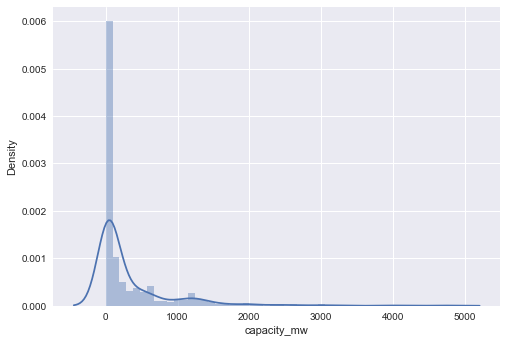

In [125]:
# Plotting capacity_mw:
sns.distplot(df['capacity_mw'])
print('Minimum',df['capacity_mw'].min())
print('Maximum',df['capacity_mw'].max())

- The label is right skewed as the minimum value is 0 and maximum value is 4760. The gap is huge.

Minimum 68.6447
Maximum 95.408


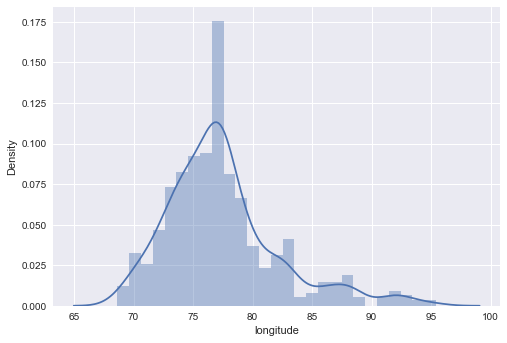

In [126]:
# plotting the longitude column:
sns.distplot(df['longitude'])
print('Minimum',df['longitude'].min())
print('Maximum',df['longitude'].max())

- Longitude column is showing normal distribution.

Minimum 8.1689
Maximum 34.649


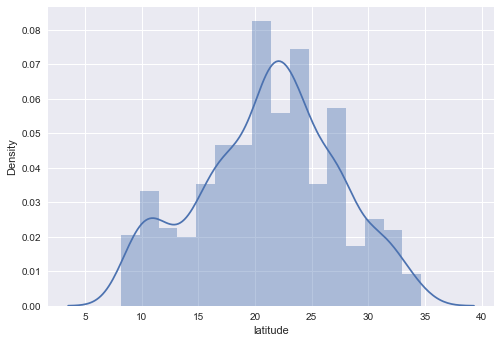

In [127]:
# Plotting Latitude column:
sns.distplot(df['latitude'])
print('Minimum',df['latitude'].min())
print('Maximum',df['latitude'].max())

- Latitude column is also showing normal distribution.

Minimum nan
Maximum nan


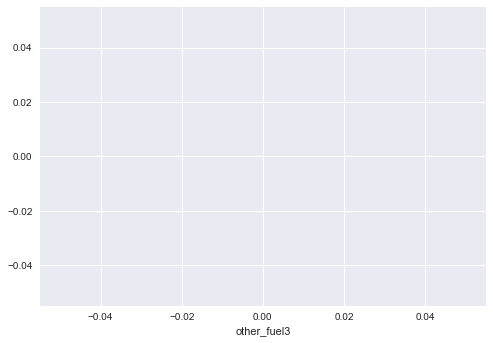

In [128]:
# Plotting other_fuel column:
sns.distplot(df['other_fuel3'])
print('Minimum',df['other_fuel3'].min())
print('Maximum',df['other_fuel3'].max())

- as it doesnt contains any value,hence,Not plotting anything.

In [129]:
# Lets drop unnessesory columns:
drop_columns=['country','name','gppd_idnr','country_long','other_fuel1','other_fuel2','other_fuel3','url','wepp_id','estimated_generation_gwh',
              'year_of_capacity_data']
df=df.drop(columns=drop_columns,axis=1)

capacity_mw                AxesSubplot(0.125,0.71587;0.168478x0.16413)
latitude                AxesSubplot(0.327174,0.71587;0.168478x0.16413)
longitude               AxesSubplot(0.529348,0.71587;0.168478x0.16413)
commissioning_year      AxesSubplot(0.731522,0.71587;0.168478x0.16413)
generation_gwh_2013       AxesSubplot(0.125,0.518913;0.168478x0.16413)
generation_gwh_2014    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
generation_gwh_2015    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
generation_gwh_2016    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
generation_gwh_2017       AxesSubplot(0.125,0.321957;0.168478x0.16413)
dtype: object

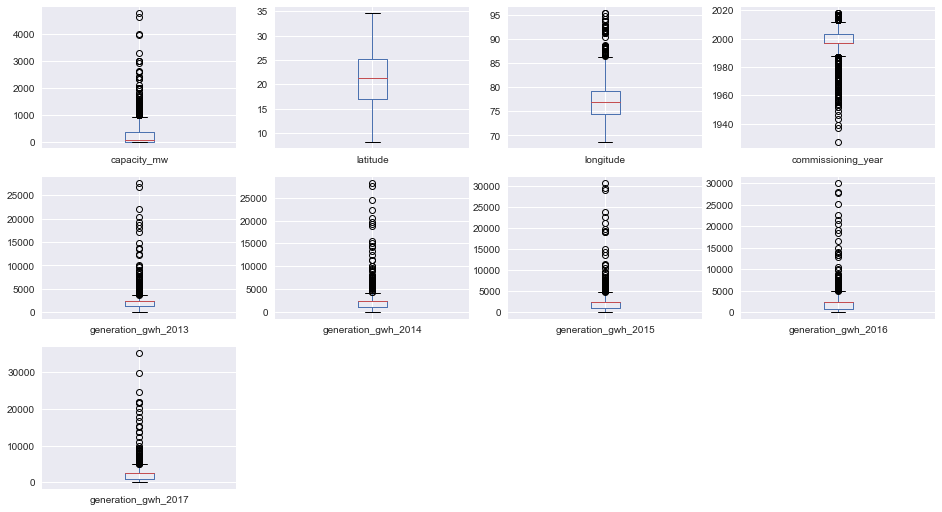

In [130]:
# Checking the outliers by using box plot:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(16,12))

- Except latitude column all the continuous columns are having outliers.

In [131]:
df['primary_fuel']= df['primary_fuel'].replace({'Hydro':1,'Coal':2,'Solar':3,'Wind':4,'Gas':5,'Biomass':6,'Oil':7,'Nuclear':8})

In [132]:
df['primary_fuel'].value_counts()

2    259
1    250
3    127
4    123
5     69
6     50
7     21
8      9
Name: primary_fuel, dtype: int64

- encoded the categories of the target variable 'primary_fuel'.

# Dividing the target variable and the features:

In [133]:
y = df['primary_fuel']
x = df.drop(columns=['primary_fuel'])
x

,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,2011.000000,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,98.0,24.7663,74.6090,1996.876894,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,39.2,21.9038,69.3732,1996.876894,AES,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,135.0,23.8712,91.3602,2004.000000,Acc Acc ltd,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,2015.000000,Acc Acc ltd,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,2016.000000,Acc Acc ltd,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,3.0,12.8932,78.1654,1996.876894,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,25.5,15.2758,75.5811,1996.876894,Acc Acc ltd,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,80.0,24.3500,73.7477,1996.876894,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


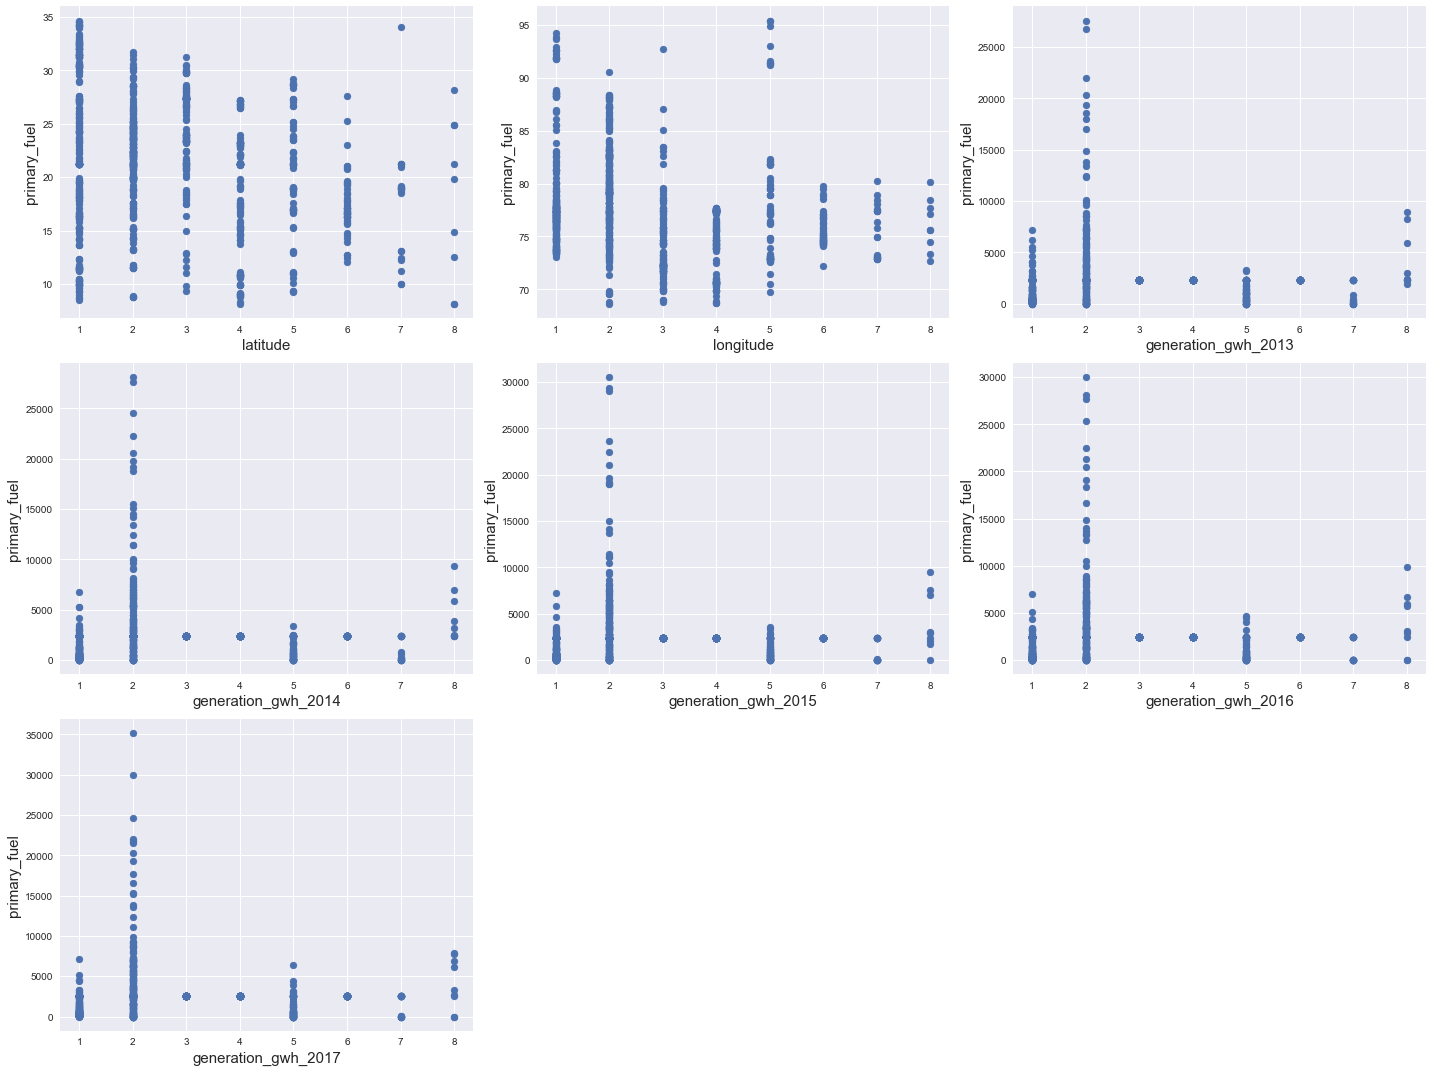

In [134]:
# Separating the continuous feature and checking relation with Primary fuel:
df_con_features=df[['latitude','longitude',
                    'generation_gwh_2013','generation_gwh_2014',
                    'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(y,df_con_features[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel('primary_fuel',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- As we can see, latitude of Hydro and coal power plants are more than other types of power plants.
- longitude of Hydro and coal power plants are more than other types of power plants.
- From 2013 to 2017 electricity is generated highest by coal power plants and 2nd highest is by Hydro power plants.

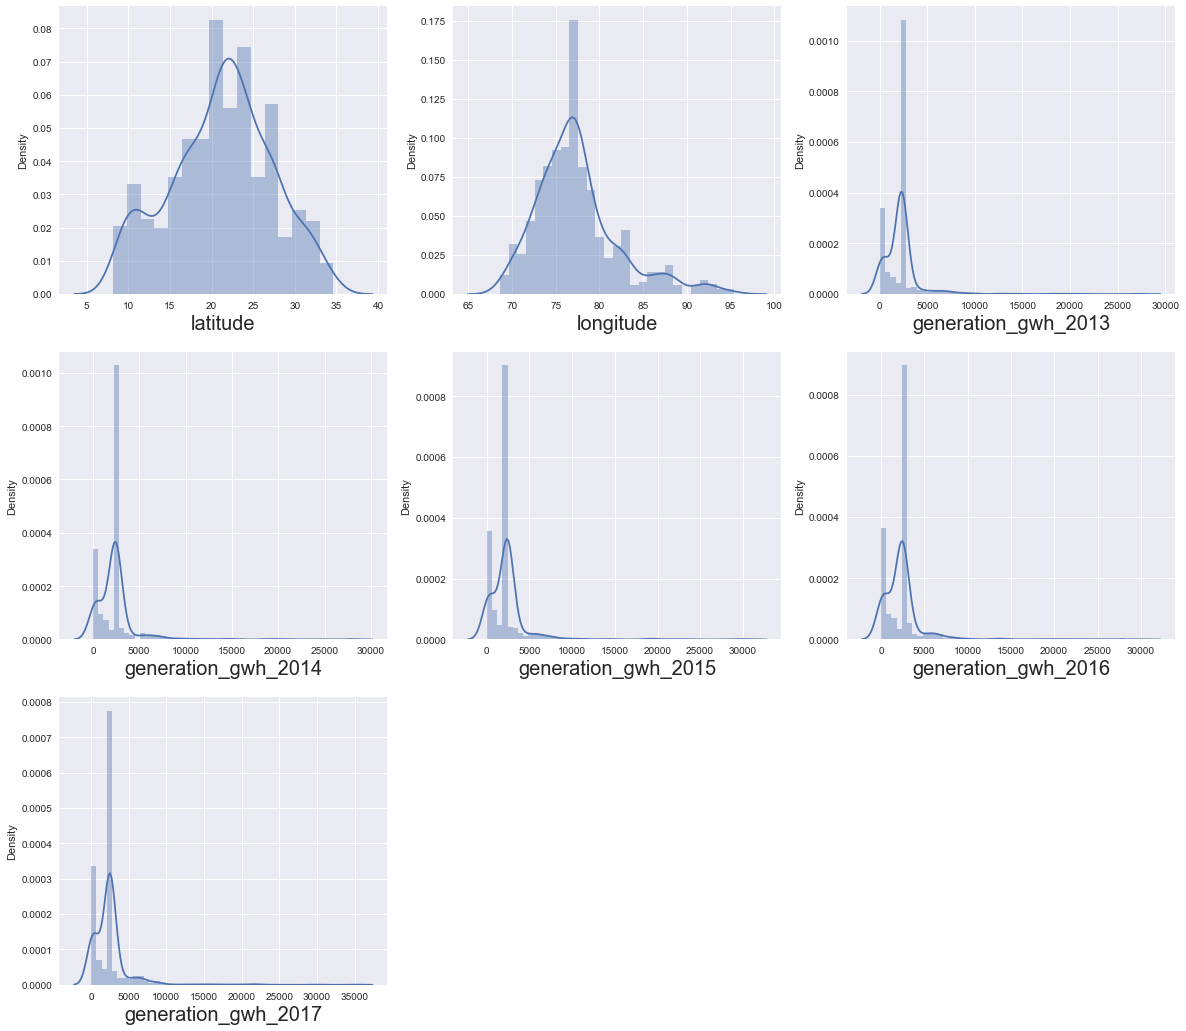

In [135]:
# Checking the normal distribution:
plt.figure(figsize=(20,18),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df_con_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show() 

- Latitude and longitude is showing normal distribution.
- Rest all the columns are highly skewed.

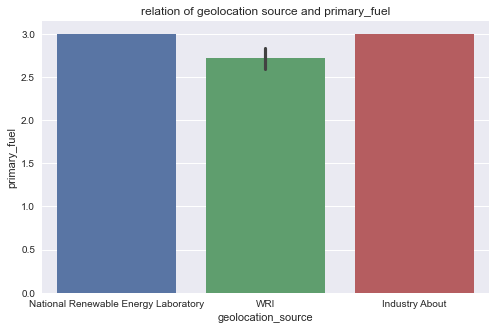

In [136]:
#Plotting geolocation source and primary fuel:
plt.figure(figsize=(8,5))
sns.barplot(x='geolocation_source',y='primary_fuel',data=df).set_title('relation of geolocation source and primary_fuel')
plt.show()

- Both National Renewable Energy Laboratory and IN=ndustry consume  approx same amount of Primary fuel.

In [137]:
# Separating another target variable capacity_mw with the features:
Y = df['capacity_mw']
X = df.drop(columns=['capacity_mw'])
X

,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,28.1839,73.2407,3,2011.000000,Solar Paces,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
1,24.7663,74.6090,2,1996.876894,Ultratech Cement ltd,Ultratech Cement ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
2,21.9038,69.3732,4,1996.876894,AES,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
3,23.8712,91.3602,5,2004.000000,Acc Acc ltd,Central Electricity Authority,WRI,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,21.9603,82.4091,2,2015.000000,Acc Acc ltd,Central Electricity Authority,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,16.2949,77.3568,2,2016.000000,Acc Acc ltd,Central Electricity Authority,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority
904,12.8932,78.1654,3,1996.876894,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
905,15.2758,75.5811,4,1996.876894,Acc Acc ltd,CDM,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority
906,24.3500,73.7477,2,1996.876894,Hindustan Zinc ltd,Hindustan Zinc ltd,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,Central Electricity Authority


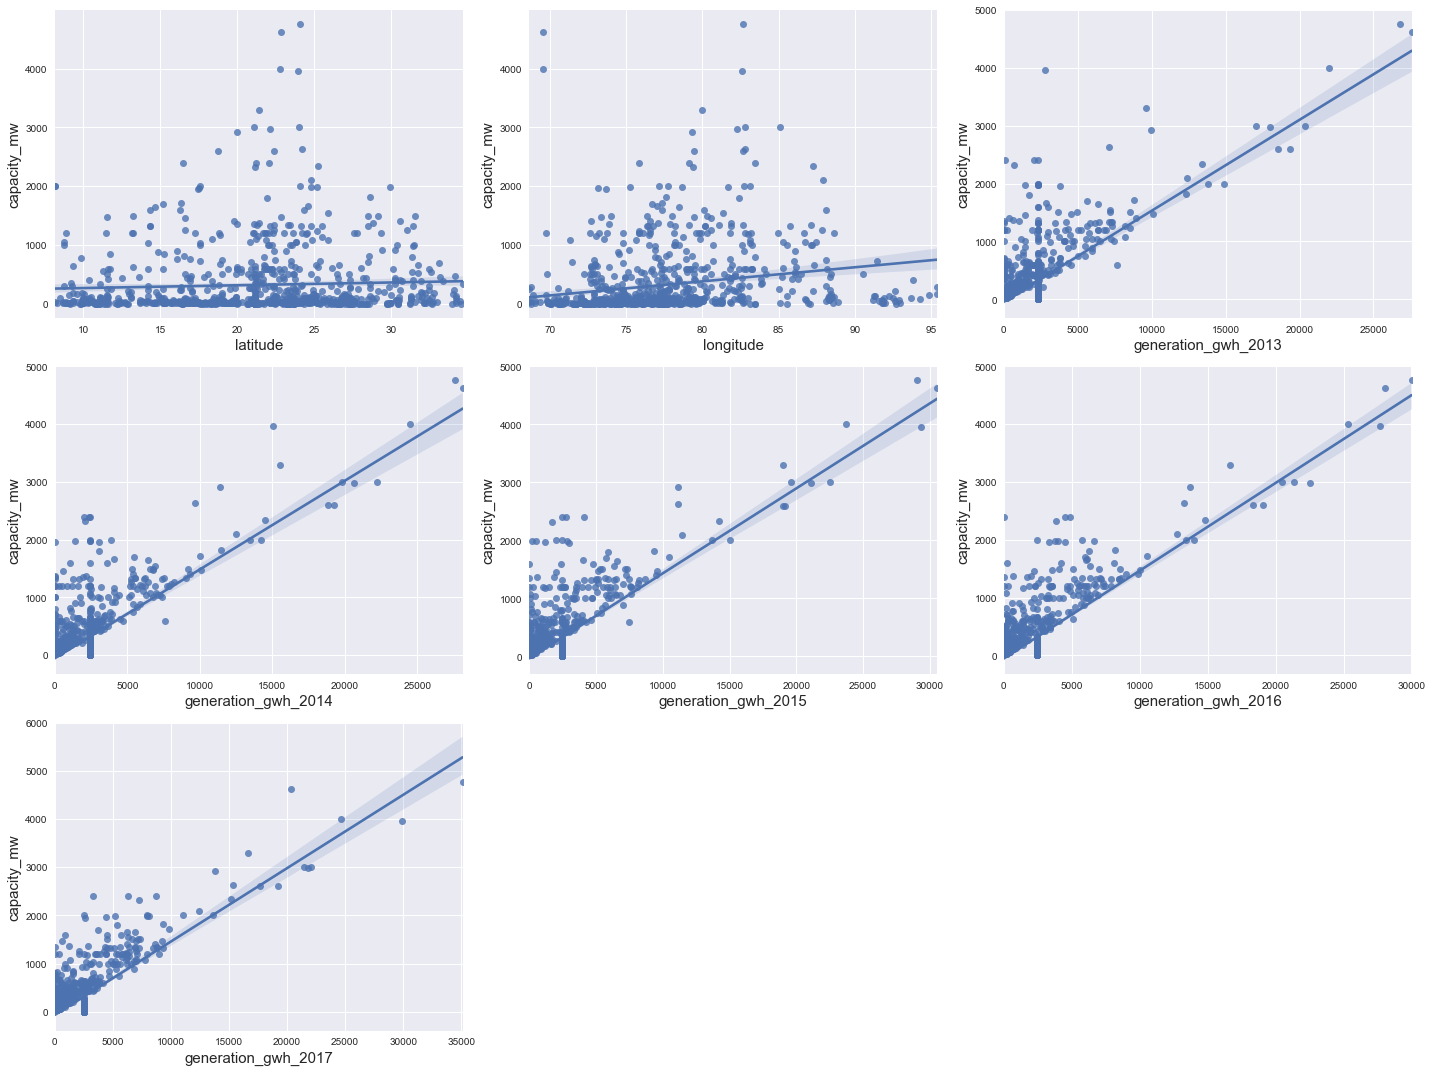

In [138]:
# Checking relation between the capacity_mw and the continuous features:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_con_features:
    if plotnumber<=8:
        ax=plt.subplot(3,3,plotnumber)
        sns.regplot(df_con_features[column],Y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('capacity_mw',fontsize=15)
    plotnumber+=1
plt.tight_layout() 

- Capacity_mw have no relation with latitude and longitude.
- capacity_mw have relation with generation_gwh-2013 generation_gwh-2014,generation_gwh-2015,generation_gwh-2016 and generation_gwh-2017.

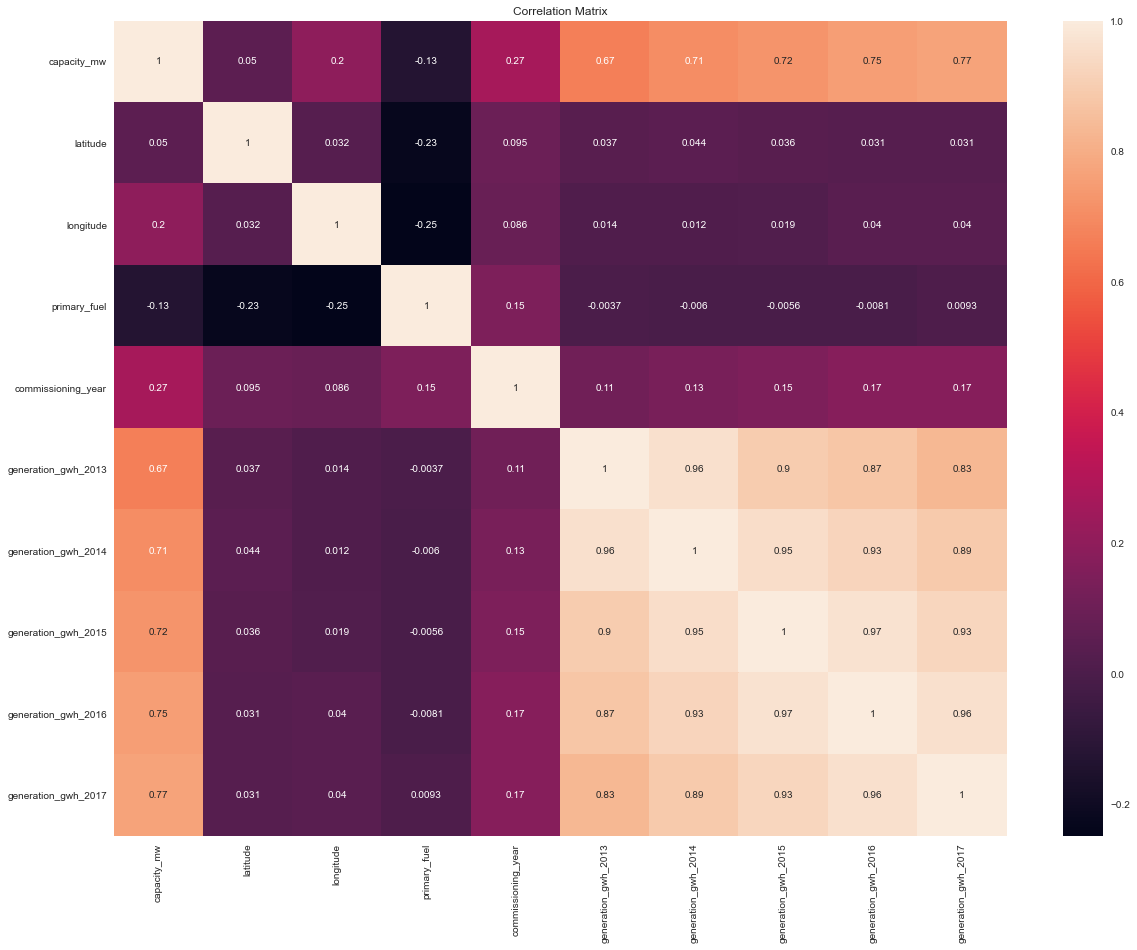

In [139]:
# CHECKING MULTI-COLINEARITY OF THE COLUMNS:
corr_mat = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

- gwh-2013 generation_gwh-2014,generation_gwh-2015,generation_gwh-2016 and generation_gwh-2017 is co-related with capacity_mw.

In [140]:
# Encoding all the categoricalcolumns:
en=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,3,2011.000000,229.0,109.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
1,98.0,24.7663,74.6090,2,1996.876894,258.0,174.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
2,39.2,21.9038,69.3732,4,1996.876894,2.0,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
3,135.0,23.8712,91.3602,5,2004.000000,5.0,22.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0
4,1800.0,21.9603,82.4091,2,2015.000000,5.0,22.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0


- Encoded all the categorical columns.

In [141]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,3,2011.000000,229.0,109.0,1.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
1,98.0,24.7663,74.6090,2,1996.876894,258.0,174.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
2,39.2,21.9038,69.3732,4,1996.876894,2.0,21.0,2.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,0.0
3,135.0,23.8712,91.3602,5,2004.000000,5.0,22.0,2.0,631.777928,617.789264,843.747000,886.004428,663.774500,0.0
4,1800.0,21.9603,82.4091,2,2015.000000,5.0,22.0,2.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,0.0


In [142]:
#CHecking skewness:
df.skew()

capacity_mw               3.193257
latitude                 -0.147391
longitude                 1.129836
primary_fuel              0.933977
commissioning_year       -1.383330
owner                     1.366078
source                    1.829145
geolocation_source       -2.161710
generation_gwh_2013       5.241491
generation_gwh_2014       5.041961
generation_gwh_2015       5.367370
generation_gwh_2016       5.071758
generation_gwh_2017       5.111938
generation_data_source    0.000000
dtype: float64

-Most of the data is having skewness.we will remove the skewness by using power transform.

In [143]:
df=df.drop(columns='generation_data_source',axis=1)

- Dropping the generation_data_source because it contains only one type of value.

In [144]:
# REMOVING SKEWNESS BY USING POWER TRANSFORMER:

In [145]:
f=['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']

In [146]:
scaler=PowerTransformer(method='yeo-johnson')

In [147]:
df[f]=scaler.fit_transform(df[f].values)

In [148]:
df[f]

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,-0.953208,0.275916,0.288574,0.314141,0.318130,0.315890
1,-0.545103,0.275916,0.288574,0.314141,0.318130,0.315890
2,-2.380298,0.275916,0.288574,0.314141,0.318130,0.315890
3,2.188101,-0.871520,-0.858979,-0.569352,-0.532799,-0.738449
4,1.122921,-0.066258,0.544049,1.389487,1.431262,1.185388
...,...,...,...,...,...,...
903,0.155127,0.275916,0.288574,-2.244308,-1.259989,-0.568859
904,0.335003,0.275916,0.288574,0.314141,0.318130,0.315890
905,-0.280434,0.275916,0.288574,0.314141,0.318130,0.315890
906,-0.796868,0.275916,0.288574,0.314141,0.318130,0.315890


In [149]:
df.skew()

capacity_mw            3.193257
latitude              -0.147391
longitude              0.002419
primary_fuel           0.933977
commissioning_year    -1.383330
owner                  1.366078
source                 1.829145
geolocation_source    -2.161710
generation_gwh_2013    0.180340
generation_gwh_2014    0.124543
generation_gwh_2015    0.070937
generation_gwh_2016    0.038668
generation_gwh_2017    0.013392
dtype: float64

- There is still skewness in the columns.

In [150]:
bins=(0, 4, 8)
group_names=['fuel1', 'fuel2']
df['primary_fuel']=pd.cut(df['primary_fuel'], bins=bins, labels =group_names)

- As primary fuel has multi-class,we made two classes fuel 1 and fuel 2 to create a binary class.

In [151]:
df['primary_fuel'].value_counts()

fuel1    759
fuel2    149
Name: primary_fuel, dtype: int64

- Created two class fuel 1 and fuel 2 fro Multiclass primary fuel.we have only two classes now.fuel1 is having higher values than fuel2 and the differnce betwee them is high,so we will balaance the class figures by using SMOTE function.

In [152]:
# Encoding the primary fuel column by using Label encoder:
l = LabelEncoder()
l_s = ['primary_fuel']
for i in l_s:
    df[i] = l.fit_transform(df[i])

In [153]:
df['primary_fuel'].value_counts()

0    759
1    149
Name: primary_fuel, dtype: int64

- Primary fuel column is encoded.fuel 1 as 0 and fuel 2 as 1.

In [154]:
# Separating the target variable and the features:

In [155]:
y=df['primary_fuel']
x=df.drop(columns=['primary_fuel'])

In [156]:
# USING SMOTE FUNCTION FOR BALANCING:

In [157]:
sm=SMOTE()
x,y = sm.fit_resample(x,y)

# Standardization:

In [158]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# HOLD OUT METHOD:

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=100)

# BULDING MODELS FOR PREDICTING THE PRIMARY FUEL TYPE:

# 1.LOGISTIC REGRESSION:

In [737]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:76.80%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.756303    0.780847  0.768014     0.768575      0.768575
recall       0.790861    0.745167  0.768014     0.768014      0.768014
f1-score     0.773196    0.762590  0.768014     0.767893      0.767893
support    569.000000  569.000000  0.768014  1138.000000   1138.000000
 Confusion Matrix:
[[450 119]
 [145 424]]



In [738]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:74.74%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.728155    0.770115  0.747368    0.749135      0.749135
recall       0.789474    0.705263  0.747368    0.747368      0.747368
f1-score     0.757576    0.736264  0.747368    0.746920      0.746920
support    190.000000  190.000000  0.747368  380.000000    380.000000
 Confusion Matrix:
[[150  40]
 [ 56 134]]



In [739]:
roc_auc_score(y_test,lr.predict(x_test))

0.7473684210526316

# 2.DECISION TREE CLASSIFIER:

In [740]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    569.0  569.0       1.0     1138.0        1138.0
 Confusion Matrix:
[[569   0]
 [  0 569]]



In [741]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:88.42%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.901099    0.868687  0.884211    0.884893      0.884893
recall       0.863158    0.905263  0.884211    0.884211      0.884211
f1-score     0.881720    0.886598  0.884211    0.884159      0.884159
support    190.000000  190.000000  0.884211  380.000000    380.000000
 Confusion Matrix:
[[164  26]
 [ 18 172]]



In [742]:
roc_auc_score(y_test,dt.predict(x_test))

0.8842105263157896

# 3. RANDOM FORREST CLASSIFIER:

In [743]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    569.0  569.0       1.0     1138.0        1138.0
 Confusion Matrix:
[[569   0]
 [  0 569]]



In [744]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")

Accuracy score:92.11%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.921053    0.921053  0.921053    0.921053      0.921053
recall       0.921053    0.921053  0.921053    0.921053      0.921053
f1-score     0.921053    0.921053  0.921053    0.921053      0.921053
support    190.000000  190.000000  0.921053  380.000000    380.000000
 Confusion Matrix:
[[175  15]
 [ 15 175]]



In [745]:
roc_auc_score(y_test,rf.predict(x_test))

0.9210526315789473

# 4. KNEIGHBORS CLASSIFIER:

In [746]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:92.09%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.956190    0.890701  0.920914     0.923446      0.923446
recall       0.882250    0.959578  0.920914     0.920914      0.920914
f1-score     0.917733    0.923858  0.920914     0.920795      0.920795
support    569.000000  569.000000  0.920914  1138.000000   1138.000000
 Confusion Matrix:
[[502  67]
 [ 23 546]]



In [747]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:86.58%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.937107    0.814480  0.865789    0.875793      0.875793
recall       0.784211    0.947368  0.865789    0.865789      0.865789
f1-score     0.853868    0.875912  0.865789    0.864890      0.864890
support    190.000000  190.000000  0.865789  380.000000    380.000000
 Confusion Matrix:
[[149  41]
 [ 10 180]]



In [748]:
roc_auc_score(y_test,kn.predict(x_test))

0.8657894736842104

# 5. SUPPORT VECTOR CLASSIFIER:

In [749]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:85.33%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.728155    0.770115  0.747368    0.749135      0.749135
recall       0.789474    0.705263  0.747368    0.747368      0.747368
f1-score     0.757576    0.736264  0.747368    0.746920      0.746920
support    190.000000  190.000000  0.747368  380.000000    380.000000
 Confusion Matrix:
[[477  92]
 [ 75 494]]



In [750]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:84.21%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.849462    0.835052  0.842105    0.842257      0.842257
recall       0.831579    0.852632  0.842105    0.842105      0.842105
f1-score     0.840426    0.843750  0.842105    0.842088      0.842088
support    190.000000  190.000000  0.842105  380.000000    380.000000
 Confusion Matrix:
[[158  32]
 [ 28 162]]



In [752]:
roc_auc_score(y_test,svc.predict(x_test))

0.8421052631578947

# CROSS VALIDATION SCORE:

In [754]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:72.47%


In [755]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:86.70%


In [756]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:92.16%


In [757]:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:83.01%


In [758]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:53.89%


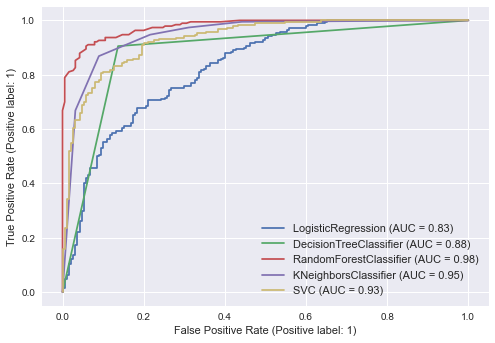

In [759]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- Choosing random forest model as the best model for the classificaton problem for predicting the primary fuel type because the differnce between the Accuracy score and cross validation score is least.92.16-92.15=0.05.

# HYPER PARAMETER TUNING OF THE RANDOM FOREST MODEL:

In [760]:
grid_param={
   'n_estimators':[13,15,15,17,19,21],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,30,35],
       'min_samples_split':[10,11,12,13,14,15],
       'min_samples_leaf':[5,6,7,8,9,10]}

In [761]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [762]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [13, 15, 15, 17, 19, 21]})

In [763]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 5, 'min_samples_split': 13, 'n_estimators': 21}


In [764]:
rf = RandomForestClassifier(criterion= 'entropy',max_depth=35,min_samples_leaf = 5, min_samples_split=13,n_estimators =21)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8894736842105263

- after doing hyperparameter tuning we got the score of 89%.approx.

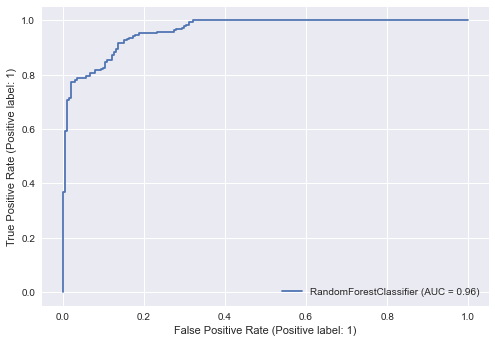

In [767]:
disp = plot_roc_curve(rf,x_test,y_test)

In [769]:
# model prediction using DT
x_predict = list(dt.predict(x_test))
rf_clglobal = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_clglobal))

      predicted_values  orignal_values
1494                 1               1
341                  0               0
733                  0               0
299                  0               0
1068                 1               1
...                ...             ...
508                  0               0
1356                 0               1
1002                 1               1
896                  0               0
1034                 1               1

[380 rows x 2 columns]


In [770]:
#import joblib
import joblib

joblib.dump(dt,'rf_clglobal.obj')

# SAVING THE MODEL

['rf_clglobal.obj']

In [772]:
rf_clglobal=joblib.load('rf_clglobal.obj')
rf_clglobal.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,

# Now we will create regression models to predict the capacity_mw.

In [773]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,-0.953208,0,2011.000000,229.0,109.0,1.0,0.275916,0.288574,0.314141,0.318130,0.315890
1,98.0,24.7663,-0.545103,0,1996.876894,258.0,174.0,2.0,0.275916,0.288574,0.314141,0.318130,0.315890
2,39.2,21.9038,-2.380298,0,1996.876894,2.0,21.0,2.0,0.275916,0.288574,0.314141,0.318130,0.315890
3,135.0,23.8712,2.188101,1,2004.000000,5.0,22.0,2.0,-0.871520,-0.858979,-0.569352,-0.532799,-0.738449
4,1800.0,21.9603,1.122921,0,2015.000000,5.0,22.0,2.0,-0.066258,0.544049,1.389487,1.431262,1.185388


# Separating the target variable and the  Features:

In [160]:
Y=df['capacity_mw']
X=df.drop(columns=['capacity_mw'])

# STANDARDIZATION:

In [161]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# HOLD OUT METHOD:

In [162]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=21)

# BULDING MODELS FOR PREDICTING THE CAPACITY_MW:

# 1.KNEIGHBORS REGRESSOR:

In [163]:
#Model Training:
kn = KNeighborsRegressor()
kn.fit(X_train,Y_train)

KNeighborsRegressor()

In [164]:
#Model Prediction with trained data:
Y_knn_pred = kn.predict(X_train)

In [165]:
print("R Square Score of kn:",r2_score(Y_train,Y_knn_pred))

R Square Score of kn: 0.8633752380962386


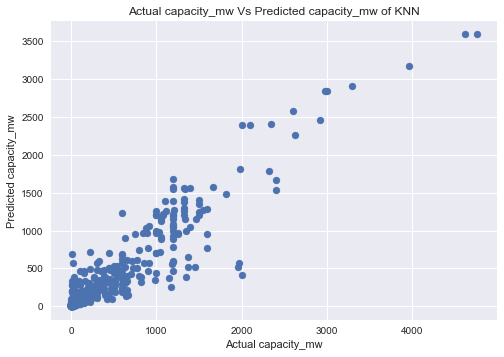

In [166]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_knn_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of KNN')
plt.show()

In [167]:
# Predicting test data with model:
Y_test_kn_pred = kn.predict(X_test)

In [168]:
kn_accuracy =r2_score(Y_test,Y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.7932416691358738


In [169]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(Y_test,Y_test_kn_pred))

mean absolute error of K-Neighbors Regressor is:  132.445859030837


In [170]:
print ('mean squared error of kn is: ',mean_squared_error(Y_test,Y_test_kn_pred))

mean squared error of kn is:  66934.46872349957


In [171]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(Y_test,Y_test_kn_pred)))

Root mean squared error of K-Neighbors Regressor is:  258.716966439195


# 2.RANDOM FORREST REGRESSOR:

In [172]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [173]:
#Model Prediction with trained data:
Y_rfr_pred = rfr.predict(X_train)

In [174]:
print("R Square Score of Random Forest Regressor:" ,r2_score(Y_train,Y_rfr_pred))

R Square Score of Random Forest Regressor: 0.9784409460466135


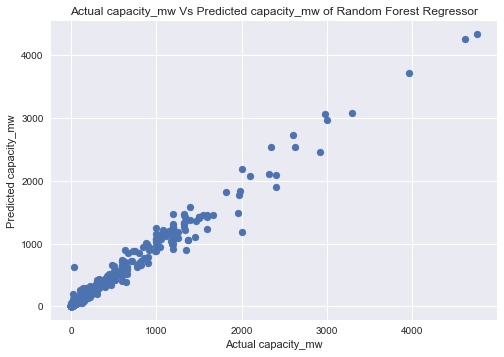

In [175]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_rfr_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of Random Forest Regressor')
plt.show()

In [176]:
# Predicting test data with model:
Y_test_rfr_pred = rfr.predict(X_test)

In [177]:
rfr_accuracy =r2_score(Y_test,Y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.8664557783243961


In [178]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(Y_test,Y_test_rfr_pred))

mean absolute error of Random Forest Regressor:  108.70673860817108


In [179]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(Y_test,Y_test_rfr_pred))

mean squared error of Random Forest Regressor is:  43232.65472105203


In [180]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(Y_test,Y_test_rfr_pred)))

Root mean squared error of Random Forest Regressor is:  207.924637118962


# 3.GRADIENT BOOST REGRESSOR:

In [181]:
# Model Training:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [182]:
#Model Prediction with trained data:
Y_gbr_pred = gbr.predict(X_train)

In [183]:
print("R Square Score of Gradient Boosting Regressor: ",r2_score(Y_train,Y_gbr_pred))

R Square Score of Gradient Boosting Regressor:  0.9705998591728708


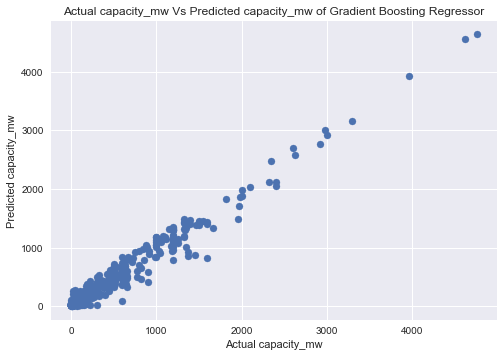

In [184]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_gbr_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of Gradient Boosting Regressor')
plt.show()

In [185]:
# Predicting test data with model:
Y_test_gbr_pred = gbr.predict(X_test)

In [186]:
gbr_accuracy = r2_score(Y_test,Y_test_gbr_pred)
print("R Square Score of Gradient Boosting Regressor:",gbr_accuracy)
print('Accuracy of GBR :',gbr_accuracy*100)

R Square Score of Gradient Boosting Regressor: 0.8619869950991211
Accuracy of GBR : 86.19869950991212


In [187]:
print ('mean absolute error of Gradient Boosting Regressor: ',mean_absolute_error(Y_test,Y_test_gbr_pred))

mean absolute error of Gradient Boosting Regressor:  108.47948279242354


In [188]:
print ('mean squared error of Gradient Boosting Regressor is: ',mean_squared_error(Y_test,Y_test_gbr_pred))

mean squared error of Gradient Boosting Regressor is:  44679.34675892127


In [189]:
print ('Root mean squared error of Gradient Boosting Regressor: ',np.sqrt(mean_squared_error(Y_test,Y_test_gbr_pred)))

Root mean squared error of Gradient Boosting Regressor:  211.3748962363347


# 4.XGB REGESSOR:

In [190]:
xgb=xgb.XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [191]:
#Model Prediction with trained data:
Y_xgb_pred = xgb.predict(X_train)

In [192]:
print("R Square Score of xgb:",r2_score(Y_train,Y_xgb_pred))

R Square Score of xgb: 0.9998247771443386


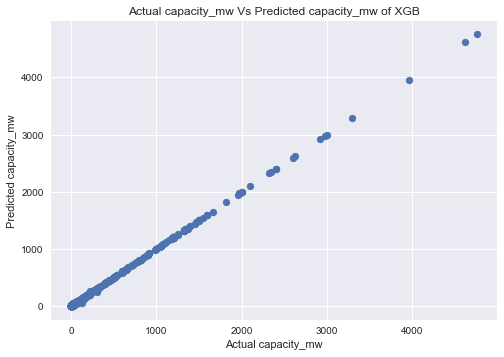

In [193]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_xgb_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of XGB')
plt.show()

In [194]:
# Predicting test data with model:
Y_test_xgb_pred = xgb.predict(X_test)

In [195]:
xgb_accuracy =r2_score(Y_test,Y_test_xgb_pred)
print("R Square Score of xgb:",xgb_accuracy)

R Square Score of xgb: 0.8273872622095539


In [196]:
print ('mean absolute error of XGB: ',mean_absolute_error(Y_test,Y_test_xgb_pred))

mean absolute error of XGB:  120.03839825822813


In [197]:
print ('mean squared error of  XGB is: ',mean_squared_error(Y_test,Y_test_xgb_pred))

mean squared error of  XGB is:  55880.41773516216


In [198]:
print ('Root mean squared error of XGB is: ',np.sqrt(mean_squared_error(Y_test,Y_test_xgb_pred)))

Root mean squared error of XGB is:  236.39039264564488


# 5. DECISION TREE REGRESSOR:

In [199]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [200]:
#Model Prediction with trained data:
Y_dt_pred = dt.predict(X_train)

In [201]:
print("R Square Score of Decision Tree Regressor: ",r2_score(Y_train,Y_dt_pred))

R Square Score of Decision Tree Regressor:  0.9999725838135269


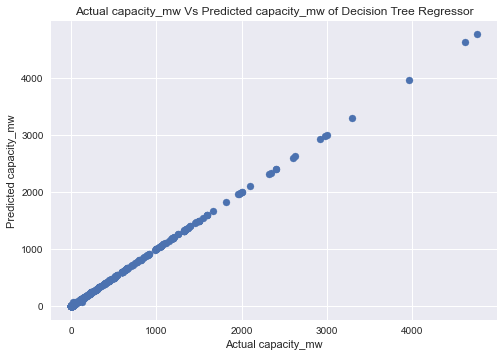

In [202]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(Y_train,Y_dt_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of Decision Tree Regressor')
plt.show()

In [203]:
# Predicting test data with model:
Y_test_dt_pred = dt.predict(X_test)

In [204]:
dt_accuracy = r2_score(Y_test,Y_test_dt_pred)
print("R Square Score of Decision Tree Regressor:",dt_accuracy)
print('Accuracy of dt :',dt_accuracy*100)

R Square Score of Decision Tree Regressor: 0.8036324389151751
Accuracy of dt : 80.36324389151751


In [205]:
print ('mean absolute error of Decision Tree Regressor: ',mean_absolute_error(Y_test,Y_test_dt_pred))

mean absolute error of Decision Tree Regressor:  127.66633039647576


In [206]:
print ('mean squared error of Decision Tree Regressor: ',mean_squared_error(Y_test,Y_test_dt_pred))

mean squared error of Decision Tree Regressor:  63570.63495729074


In [207]:
print ('Root mean squared error of Decision Tree Regressor: ',np.sqrt(mean_squared_error(Y_test,Y_test_dt_pred)))

Root mean squared error of Decision Tree Regressor:  252.13217755235198


# CROSS VALIDATION SCORE:

In [208]:
kn_cv_score = cross_val_score(kn,X_train,Y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean()*100)

[0.68607807 0.82098591 0.8013622  0.82674587 0.71878559]
mean : 77.07915285755159


In [209]:
rfr_cv_score = cross_val_score(rfr,X_train,Y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean()*100)

[0.721936   0.8696715  0.88257854 0.8760214  0.85235657]
mean : 84.0512803467585


In [210]:
gbr_cv_score = cross_val_score(gbr,X_train,Y_train,cv=5,scoring='r2')
print(gbr_cv_score)
print('mean :',gbr_cv_score.mean()*100)

[0.70381242 0.83560688 0.88409484 0.86208213 0.85931643]
mean : 82.89825390819044


In [211]:
dt_cv_score = cross_val_score(dt,X_train,Y_train,cv=5,scoring='r2')
print(dt_cv_score)
print('mean :',dt_cv_score.mean()*100)

[0.65291332 0.77074039 0.69089179 0.7476991  0.68370055]
mean : 70.91890295463989


In [212]:
xgb_cv_score = cross_val_score(xgb,X_train,Y_train,cv=5,scoring='r2')
print(xgb_cv_score)
print('mean :',xgb_cv_score.mean()*100)

[0.71961244 0.78542936 0.88771965 0.88786965 0.83539247]
mean : 82.32047174325317


- Choosing XGB Regressor as the best model because we got the least differnce of accuracy score and cross validation of this model which is,82.7-82.3=.4.

# HYPER PARAMETER TUNING OF XGB REGRESSOR MODEL:

In [836]:
xgbr = xgb.XGBRegressor()
grid_param= {'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective':['reg:squarederror']}

In [837]:
gbr_search=GridSearchCV(xgbr,param_grid=grid_param,scoring='neg_mean_squared_error',n_jobs=1,cv=5)
gbr_search.fit(X_train,Y_train)
gbr_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [838]:
xgbr= xgb.XGBRegressor(learning_rate=0.1,max_depth=10,colsample_bytree=0.5,n_estimators=200) 
xgbr.fit(X_train,Y_train)
Y_pred=xgbr.predict(X_test)

In [839]:
print("*** Accuracy Post Tuning***")
print(r2_score(Y_test,Y_pred)*100)

*** Accuracy Post Tuning***
83.41981992802717


- After Hyper Parameter tuning we got the score of 83.4%.

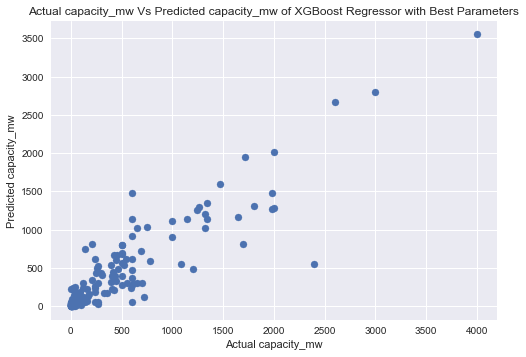

In [840]:
# Checking Actual sales Vs Predicted sales using Graph after Hyperparameter tuning:
plt.scatter(Y_test,Y_pred)
plt.xlabel('Actual capacity_mw')
plt.ylabel('Predicted capacity_mw')
plt.title('Actual capacity_mw Vs Predicted capacity_mw of XGBoost Regressor with Best Parameters')
plt.show()

In [841]:
# model prediction using XGBRegressor
X_predict = list(xgbr.predict(X_test))
xgbr_regglob = {'predicted_values':X_predict,'orignal_values':Y_test}
print(pd.DataFrame(xgbr_regglob))

     predicted_values  orignal_values
301         27.705650           91.80
44         161.085373          180.00
216          0.894415           10.50
590        302.613434          702.86
446         23.006319            4.50
..                ...             ...
855        187.123688          240.00
459        311.967316          394.00
60         118.136337          720.00
138        102.200241           40.00
405         15.497344           25.00

[227 rows x 2 columns]


In [842]:
#importing joblib
import joblib

joblib.dump(xgbr,'xgbr_regglob.obj')

# SAVING THE MODEL

['xgbr_regglob.obj']

In [843]:
xgbr_from_joblib=joblib.load('xgbr_regglob.obj')
xgbr_from_joblib.predict(X_test)

#TESTING THE SAVED MODELxgbr_from_joblib=joblib.load('xgbr_capa.obj')
xgbr_from_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([ 2.77056503e+01,  1.61085373e+02,  8.94415021e-01,  3.02613434e+02,
        2.30063190e+01,  5.03841003e+02,  3.58612175e+01,  3.34180756e+01,
        5.27832870e+01,  1.18331131e+02,  2.61580887e+01,  2.24595245e+02,
        2.63839760e+01,  1.38492775e+01,  1.03884363e+03,  7.32937622e+01,
        4.74146461e+01,  2.21847702e+02,  1.72220802e+01,  3.28190880e+01,
        1.91358376e+01,  1.97391453e+01,  1.13407776e+03,  4.49032654e+02,
        2.17611603e+02,  1.21584946e+02,  3.41564514e+02,  1.07992544e+01,
        1.13923877e+03,  3.95377106e+02,  1.38346893e+02,  5.20406532e+01,
        7.92517242e+01,  1.08603302e+02,  7.79396057e+00,  1.48409546e+03,
       -6.63812935e-01,  1.08384771e+01,  3.44536621e+02,  2.49577774e+02,
        2.86427185e+02,  2.44230270e+01,  4.12038231e+01,  2.55246391e+01,
        1.28635278e+03,  9.67682953e+01,  9.11305603e+02,  3.66107559e+01,
        6.25834389e+01,  1.27947212e+02,  4.01446777e+02,  4.37251434e+01,
        5.31006088e+01,  

# CONCLUSION:
- In this dataset we got details of 908 power plants of India,from which our target was to predict two items,Primary fuel which is categorical and Capacity_mw which is continuous in nature.We built both classification and regression models to predict both of them.
- we saw that there were eight categories of Primary fuel.we combined the categories of primary fuel to make it two ,fuel1 and fuel2.which helps to put it in bulding the classification models.
- We set up a process with many steps in order to achieve good accuracy and efficient results.We explored and understood the dataset by exploratory data analysis with the help of histograms, graphs of features against class and more. This helped us understand how the dataset was distributed and if there was any bias in the dataset that we would have to handle before training models. We also plotted the label data and realised the class label was highly unbalanced, and fixed it with Smote Analysis.Further, With the help of various preprocessing techniques, such as Handling missing, Outlier detection, feature selection, categorial to numeric transformation,and data sampling, we attempted our best to clean and transform data to improve data efficiency. After cleaning and preprocessing the data, we trained various models on the dataset.
- We created five models each for both the regression and classification problem.While predicting the classification problem we chose random forrest as the best model which gave the score of 89% after hyperparameter tuning.
- While predicting the classification problem we chose XGB REGRESSOR as the best model which gave the score of 83% after hyperparameter tuning.